## 

In [80]:
suppressMessages(suppressWarnings(library (tidyverse)))

selected_genes = c(
    ## target genes (round 1)
    'MTF1','MCL1',
    # 'CYLD','APLP2',
    ## target genes (round 2)
    'SQLE','INTS5',
    ## 'WP_PATHWAYS_AFFECTED_IN_ADENOID_CYSTIC_CARCINOMA':
    # 'KMT2C','FBXW7','BCOR','ARID5B','PTEN','NOTCH1','ATM','PIK3CA',
    'ARID4B','ATRX','BCORL1',
    ## 'MIR3925_3P'
    'FLAD1',
    'MEIS2',
    'MARCKS',
    'NFE2L1',
    'MAP3K3',
    'C22orf46',
    'UBXN4',
    'CELF2'
)

read.table('hl60_delta_mtyl_table.txt',sep='\t',header=TRUE) %>% 
    dplyr::filter(name %in% selected_genes) %>% 
    dplyr::select(chr, name,ensembl,start,end,logFC,p_value) %>% 
    arrange (name, desc(abs(logFC)),p_value)

chr,name,ensembl,start,end,logFC,p_value
<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>
chr1,ARID4B,ENSG00000054267.22,235181852,235181901,-5.3798974,1.090897e-04
chr1,ARID4B,ENSG00000054267.22,235131933,235135686,4.8751973,4.258416e-08
chr1,ARID4B,ENSG00000054267.22,235131734,235131783,-1.3734279,3.928503e-03
chrX,ATRX,ENSG00000085224.22,77685000,77688860,-5.4510385,2.353828e-03
chrX,ATRX,ENSG00000085224.22,77682758,77682807,5.2882670,8.854450e-04
chrX,ATRX,ENSG00000085224.22,77673994,77674043,4.8040210,2.639629e-05
chrX,ATRX,ENSG00000085224.22,77521478,77521527,4.4659081,3.829439e-03
chrX,ATRX,ENSG00000085224.22,77681660,77681709,-2.9387636,4.730416e-05
chrX,ATRX,ENSG00000085224.22,77682060,77682109,-0.7539954,3.139958e-03


## Plot Gene and Peak Coverage

### 
`radar` conda env

In [1]:
%load_ext rpy2.ipython

In [2]:
%%R 
suppressMessages(suppressWarnings(library (RADAR)))
suppressMessages(suppressWarnings(library (patchwork)))

In [3]:
%%R
radar0 <- readRDS('radar/finalObj.rds')

In [4]:
%%R
radar <- PrepCoveragePlot(radar0)

In [5]:
%%R 
summary(radar)

MeRIP.RADAR dataset of 4 samples.
Read count quantified in 50-bp consecutive bins on the transcript.
The total read count for Input and IP samples are (Million reads):
         U1    U2    T1    T2
Input 29.95 37.35 33.16 29.93
IP    38.34 36.35 43.09 44.55
Input gene level read count available.
There are 1 predictor variables/covariates. Can access by function variable(MeRIPdata). 
Differential methylation tested by PoissonGamma test (RADAR).
Multiple test corrected by Benjamini & Hochberg.


### [ARID4B](https://www.genecards.org/cgi-bin/carddisp.pl?gene=ARID4B)

In [57]:
%%R 
ZoomIn_peak = c(235181852,235181901 + 30)
geneName <- 'ENSG00000054267.22'
chr <- "chr1"
title <- 'ARID4B'
ymax <- 500

gr = radar@GTF[seqnames(radar@GTF) == chr & radar@GTF$type == 'gene' & radar@GTF$gene_id == geneName]
ZoomIn_gene = c(start (gr),end (gr))

In [58]:
%%R 

p_peak <- plotGeneCov(
    radar,geneName = geneName,
    center = mean, libraryType = "opposite",
    ZoomIn = c(
        ZoomIn_peak[1],
        ZoomIn_peak[2]
    ), adjustExprLevel = T
    #, split = T
) + theme_classic() +
# theme_void() + 
theme(
    legend.position = "none",    
    axis.text.x = element_text(angle = 30, vjust = 1,hjust=1)
) + ggtitle(title)

In [59]:
%%R 

p_gene <- plotGeneCov(
    radar,geneName = geneName,
    center = mean, libraryType = "opposite",
    ZoomIn = ZoomIn_gene, adjustExprLevel = T
    #, split = T
) + theme_classic() + theme(
    axis.text.x = element_text(angle = 30, vjust = 1,hjust=1)
) + geom_vline(
    xintercept = ZoomIn_peak[1], colour="lightgrey", linetype = "longdash"
) + geom_vline(
    xintercept = ZoomIn_peak[2], colour="lightgrey", linetype = "longdash"
) + ylim(0,ymax) 

replace the existing scale.



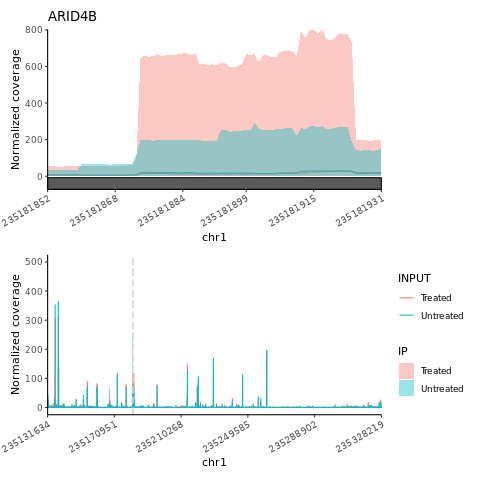

In [60]:
%%R 
p_peak / p_gene

In [61]:
%%R 
ggsave(paste0('plots/coverage_',title,'.eps'),p_peak / p_gene,width=10,height=5,dpi=600,device=cairo_ps)

### [ATRX](https://www.genecards.org/cgi-bin/carddisp.pl?gene=ATRX)


In [62]:
%%R 
ZoomIn_peak = c(77681660,77681709 + 30)
geneName <- 'ENSG00000085224.22'
chr <- "chrX"
title <- 'ATRX'
ymax <- 500

gr = radar@GTF[seqnames(radar@GTF) == chr & radar@GTF$type == 'gene' & radar@GTF$gene_id == geneName]
ZoomIn_gene = c(start (gr),end (gr))

In [63]:
%%R 


p_peak <- plotGeneCov(
    radar,geneName = geneName,
    center = mean, libraryType = "opposite",
    ZoomIn = c(
        ZoomIn_peak[1],
        ZoomIn_peak[2]
    ), adjustExprLevel = T
    #, split = T
) + theme_classic() +
# theme_void() + 
theme(
    legend.position = "none",    
    axis.text.x = element_text(angle = 30, vjust = 1,hjust=1)
) + ggtitle(title)

In [64]:
%%R 


p_gene <- plotGeneCov(
    radar,geneName = geneName,
    center = mean, libraryType = "opposite",
    ZoomIn = ZoomIn_gene, adjustExprLevel = T
    #, split = T
) + theme_classic() + theme(
    axis.text.x = element_text(angle = 30, vjust = 1,hjust=1)
) + geom_vline(
    xintercept = ZoomIn_peak[1], colour="lightgrey", linetype = "longdash"
) + geom_vline(
    xintercept = ZoomIn_peak[2] - 1000, colour="lightgrey", linetype = "longdash"
) + ylim(0,ymax) 

replace the existing scale.



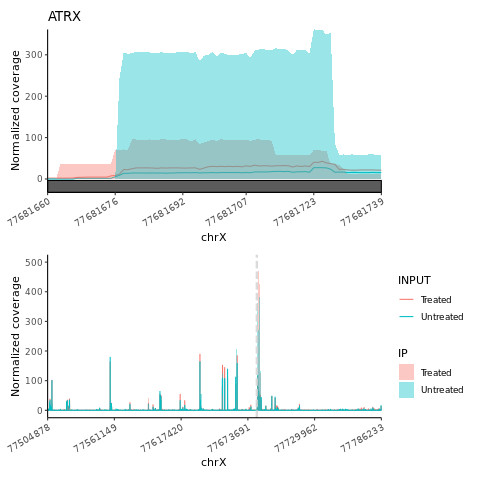

In [66]:
%%R 
p_peak / p_gene

In [67]:
%%R 
ggsave(paste0('plots/coverage_',title,'.eps'),p_peak / p_gene,width=10,height=5,dpi=600,device=cairo_ps)

### [SQLE](https://www.genecards.org/cgi-bin/carddisp.pl?gene=SQLE)

In [110]:
%%R 
ZoomIn_peak = c(124999289, 124999338 + 40)
geneName <- 'ENSG00000104549.12'
chr <- "chr8"
title <- 'SQLE'
ymax <- 500

gr = radar@GTF[seqnames(radar@GTF) == chr & radar@GTF$type == 'gene' & radar@GTF$gene_id == geneName]
ZoomIn_gene = c(start (gr),end (gr))

In [115]:
%%R 
p_peak <- plotGeneCov(
    radar,geneName = geneName,
    center = mean, libraryType = "opposite",
    ZoomIn = c(
        ZoomIn_peak[1],
        ZoomIn_peak[2]
    ), adjustExprLevel = T
    #, split = T
) + theme_classic() +
# theme_void() + 
theme(
    legend.position = "none",    
    axis.text.x = element_text(angle = 30, vjust = 1,hjust=1)
) + ggtitle(title)

In [118]:
%%R 



p_gene <- plotGeneCov(
    radar,geneName = geneName,
    center = mean, libraryType = "opposite",
    ZoomIn = ZoomIn_gene, adjustExprLevel = T
    #, split = T
) + theme_classic() + theme(
    axis.text.x = element_text(angle = 30, vjust = 1,hjust=1)
) + geom_vline(
    xintercept = ZoomIn_peak[1], colour="lightgrey", linetype = "longdash"
) + geom_vline(
    xintercept = ZoomIn_peak[2] - 1000, colour="lightgrey", linetype = "longdash"
) + ylim(0,ymax) 

replace the existing scale.



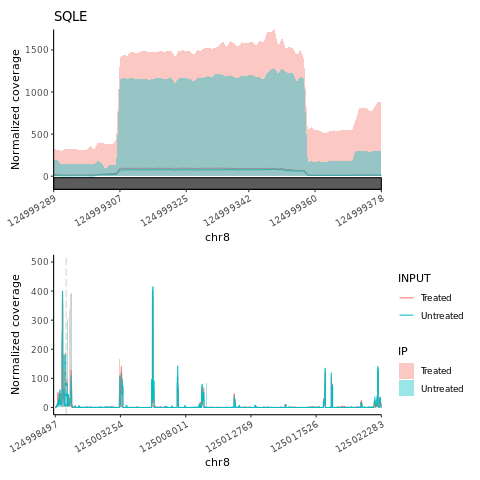

In [119]:
%%R 
p_peak / p_gene

In [120]:
%%R 
ggsave(paste0('plots/coverage_',title,'.eps'),p_peak / p_gene,width=10,height=5,dpi=600,device=cairo_ps)

### [INTS5](https://www.genecards.org/cgi-bin/carddisp.pl?gene=INTS5)

In [122]:
%%R 
ZoomIn_peak = c(62649635,62649684)
geneName <- 'ENSG00000185085.2'
chr <- "chr11"
title <- 'INTS5'
ymax <- 500

gr = radar@GTF[seqnames(radar@GTF) == chr & radar@GTF$type == 'gene' & radar@GTF$gene_id == geneName]
ZoomIn_gene = c(start (gr),end (gr))

In [123]:
%%R 

p_peak <- plotGeneCov(
    radar,geneName = geneName,
    center = mean, libraryType = "opposite",
    ZoomIn = c(
        ZoomIn_peak[1] - 30,
        ZoomIn_peak[2] - 10
    ), adjustExprLevel = T
    #, split = T
) + theme_classic() +
# theme_void() + 
theme(
    legend.position = "none",    
    axis.text.x = element_text(angle = 30, vjust = 1,hjust=1)
) + ggtitle(title)

In [124]:
%%R 


p_gene <- plotGeneCov(
    radar,geneName = geneName,
    center = mean, libraryType = "opposite",
    ZoomIn = ZoomIn_gene, adjustExprLevel = T
    #, split = T
) + theme_classic() + theme(
    axis.text.x = element_text(angle = 30, vjust = 1,hjust=1)
) + geom_vline(
    xintercept = ZoomIn_peak[1], colour="lightgrey", linetype = "longdash"
) + geom_vline(
    xintercept = ZoomIn_peak[2], colour="lightgrey", linetype = "longdash"
) + ylim(0,ymax) 

replace the existing scale.



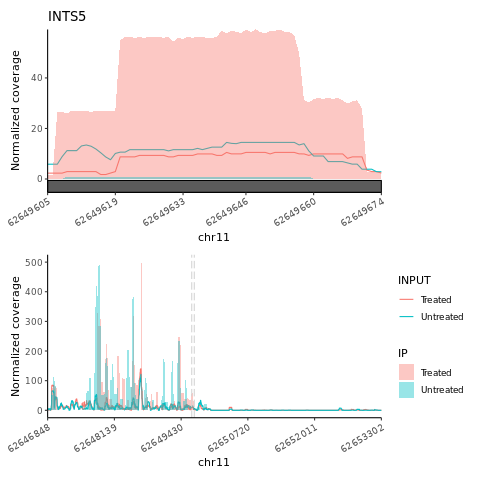

In [125]:
%%R 
p_peak / p_gene

In [126]:
%%R 
ggsave(paste0('plots/coverage_',title,'.eps'),p_peak / p_gene,width=10,height=5,dpi=600,device=cairo_ps)

### [BCORL1](https://www.genecards.org/cgi-bin/carddisp.pl?gene=BCORL1)


### [MCL1](https://www.genecards.org/cgi-bin/carddisp.pl?gene=MCL1)

### [MTF1](https://www.genecards.org/cgi-bin/carddisp.pl?gene=MTF1)


### [gene](https://www.genecards.org/cgi-bin/carddisp.pl?gene=gene)


### [gene](https://www.genecards.org/cgi-bin/carddisp.pl?gene=gene)


### [gene](https://www.genecards.org/cgi-bin/carddisp.pl?gene=gene)


### [gene](https://www.genecards.org/cgi-bin/carddisp.pl?gene=gene)


### 

In [ ]:
%%R 
sessionInfo()

## Plot annotation track

- https://www.biostars.org/p/184091

`gviz` conda env

In [1]:
suppressMessages(suppressWarnings(library (Gviz)))
suppressMessages(suppressWarnings(library (GenomicRanges)))
suppressMessages(suppressWarnings(library (GenomicFeatures)))
suppressMessages(suppressWarnings(library (tidyverse)))

In [2]:
GTF = '~/genomes/hg38/gencode.v34/gencode.v34.annotation.gtf'

gtf  = rtracklayer::import(GTF)
txdb = GenomicFeatures::makeTxDbFromGFF(GTF,organism='Homo sapiens')

Import genomic features from the file as a GRanges object ... 
OK

Prepare the 'metadata' data frame ... 
OK

Make the TxDb object ... 
Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."
OK



In [4]:
plot_gene_tracks <- function(txdb, gene_id, title, ZoomIn_peak, gen='hg38',wide=0,save=NULL){
    gn <- genes(txdb)[genes(txdb)$gene_id == gene_id]
    
    Start <- gn %>% start
    End   <- gn %>% end

    gr <- exonsBy(txdb, by = "gene")[c(gene_id)]
    gr <- unlist(gr)

    elementMetadata(gr)$transcript <- names(gr)

    gtrack  <- GenomeAxisTrack()
    itrack  <- IdeogramTrack(genome = gen, chromosome = seqnames(gn) %>% as.character, col="lightgrey",fill="orangered")
    grtrack <- Gviz::GeneRegionTrack(
        gr, 
        start = Start, end = End,
        name="",
        background.panel = NA, 
        background.title = NA
    )
    
    ht <- HighlightTrack(
        trackList = list(gtrack,grtrack),
        start = ZoomIn_peak[1] - wide, end = ZoomIn_peak[2] + wide,
        chromosome = seqnames(gn) %>% as.character,
        inBackground=FALSE,
        col="lightgrey",fill="lightgrey" #"orangered"
    )
    l = list (ht, itrack)
    s = c (3,1,1)
    if (!is.null(save)){
        pdf(save,width=10, height=2)
        Gviz::plotTracks(l,from = Start, to = End, main = title, sizes=s)
        dev.off()
    } else {
        Gviz::plotTracks(l,from = Start, to = End, main = title, sizes=s)
    }
}

In [5]:
p <- plot_gene_tracks(
    txdb, 
    'ENSG00000054267.22',
    'ARID4B',
    ZoomIn_peak = c(235181852,235181901 + 30)
    ,wide = 100
    ,save = 'plots/tracks_ARID4B.pdf'
)

In [179]:
p <- plot_gene_tracks(
    txdb, 
    'ENSG00000085224.22',
    'ATRX',
    ZoomIn_peak = c(77681660,77681709 + 30)
    ,wide = 100
    ,save = 'plots/tracks_ATRX.pdf'
)

In [180]:
p <- plot_gene_tracks(
    txdb, 
    'ENSG00000185085.2',
    'INTS5',
    ZoomIn_peak=c(62649635,62649684+40),
    ,save = 'plots/tracks_INTS5.pdf'
    
)

In [181]:
p <- plot_gene_tracks(
    txdb, 
    'ENSG00000104549.12',
    ZoomIn_peak=c(124999289,124999338 + 40),
    'SQLE',save = 'plots/tracks_SQLE.pdf'
    
)

In [182]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 18.04.4 LTS

Matrix products: default
BLAS/LAPACK: /rumi/shams/abe/anaconda3/envs/gviz/lib/libopenblasp-r0.3.18.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] grid      stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] forcats_0.5.1          stringr_1.4.0          dplyr_1.0.7           
 [4] purrr_0.3.4            readr_2.1.1            tidyr_1.1.4           
 [7] tibble_3.1.6           ggplot2_3.3.5          tidyverse_1.3.1       
[10] GenomicFeatures_1.46.1 AnnotationDbi_1.56.1   Biobase

# Target-genes

In [7]:
!cat radar/result.sig.bed | grep "end\|ENSG00000104549.12\|ENSG00000185085.2" > target-genes-sig-peaks.bed

In [8]:
!cat target-genes-sig-peaks.bed | awk -F "\t" '{print $4"\t"$2"-"$3}'

name	start-end
ENSG00000104549.12	124999289-124999338
ENSG00000185085.2	62647794-62647843
ENSG00000185085.2	62649635-62649684


## Extract Peak Sequence 

In [91]:
import pandas as pd 

In [92]:
def read_fasta(path):
    file = open(path)
    lines = file.read().splitlines()
    ids = [s[1:] for s in lines if '>' in s]
    n = [i for i,s in enumerate(lines) if '>' in s]
    n.append(len(lines))
    sequences = [''.join(lines[i+1:j]) for i,j in zip(n[:-1],n[1:])]
    file.close()
    fa = dict(zip(ids, sequences))
    return fa

In [93]:
def remove_intron(bed, fa):
    '''
    Remove introns for genes in given bed12 file 
    with blockSizes greater than 1
    '''
    # fa = read_fasta(fa)
    # bed = pd.read_table(bed, header=0)
    tochange = bed[bed.blockCount > 1]
    starts = [tochange.blockStarts[i].split(',')[:tochange.blockCount[i]] for i in tochange.index.tolist() ]
    sizes = [tochange.blockSizes[i].split(',')[:tochange.blockCount[i]] for i in tochange.index.tolist() ]
    for id, x, l in zip(tochange.name.tolist(), starts, sizes):
        fa[id] = ''.join([fa[id][int(i):int(i)+int(j)] for i,j in zip(x,l)])
    return fa


In [94]:
def search_fasta(fa1,fa2):
    return dict(
        [((x,fa1[x]),(y,fa2[y])) for x in fa1 for y in fa2 if fa1[x] in fa2[y] ]
    )
        

In [126]:
!samtools faidx /rumi/shams/abe/genomes/hg38/gencode.v34/GRCh38.primary_assembly.genome.fa

In [95]:
!which bedtools

/usr/bin/bedtools


In [49]:
# %%bash 
# bedtools getfasta -name -s -fi \
# /rumi/shams/abe/genomes/hg38/gencode.v34/GRCh38.primary_assembly.genome.fa \
# -bed target-genes.bed -split -fo target-genes.fa

In [96]:
!cat target-genes-sig-peaks.bed | awk -F "\t" '{print $4"\t"$2"-"$3}'

name	start-end
ENSG00000104549.12	124999289-124999338
ENSG00000185085.2	62647794-62647843
ENSG00000185085.2	62649635-62649684


In [97]:
%%bash 
bedtools getfasta -name -s -fi \
/rumi/shams/abe/genomes/hg38/gencode.v34/GRCh38.primary_assembly.genome.fa \
-bed target-genes-sig-peaks.bed -split -fo target-genes-sig-peaks.fa

In [98]:
# target_fa = read_fasta('target-genes.fa')
target_fa = read_fasta('target-genes-sig-peaks.fa')

# target_fa = dict([(key.split('::')[0]+'_peak'+str(i),target_fa[key]) for i,key in enumerate(target_fa)])

In [99]:
genome_fa = read_fasta('/rumi/shams/abe/genomes/hg38/gencode.v34/gencode.v34.transcripts.fa')

In [100]:
o = search_fasta(target_fa,genome_fa)

In [101]:
transcripts = dict(list({(
    o[peak][0].split('|')[1], o[peak][1]
) for peak in o.keys()}))

In [103]:
transcripts

{'ENSG00000185085.2': 'ATGCGCCGCCTGCGCTCCGCCGCTCGCGCCTCGGGCTCGGCTCGGGCTCCGGGATGTCCGCGCTGTGCGACCCTCCCGGGGCCCCAGGGCCACCTGGGCCTGCCCCGGCCACCCACGGTCCCGCGCCTCTCAGTGCTCAGGAGCTGTCCCAGGAAATCAAGGCTTTTCTGACTGGCGTAGACCCCATTCTGGGCCACCAACTCTCAGCCCGGGAACATGCTCGCTGTGGTCTTCTCCTGCTCCGTTCTTTGCCACCTGCTCGGGCTGCTGTGCTTGACCACTTGAGAGGTGTCTTTGATGAGAGTGTCCGGGCCCACCTGGCTGCCCTGGATGAAACCCCTGTGGCTGGTCCACCTCACCTCCGTCCACCTCCACCCTCTCATGTCCCTGCTGGTGGACCTGGTCTAGAGGATGTGGTTCAGGAAGTGCAGCAGGTGCTGTCTGAGTTTATCCGGGCCAACCCAAAGGCCTGGGCACCTGTGATTAGTGCATGGTCCATTGACCTCATGGGGCAACTGAGCAGCACGTACTCAGGCCAGCACCAGCGTGTTCCCCACGCTACTGGCGCTCTTAATGAACTGCTACAGCTGTGGATGGGTTGTAGGGCCACGCGTACATTAATGGACATCTATGTGCAGTGCCTCTCGGCTCTCATTGGTAGCTGCCCAGATGCGTGTGTGGATGCCTTGCTGGATACCTCTGTTCAGCATTCTCCACACTTTGACTGGGTTGTGGCACATATTGGCTCCTCTTTTCCTGGCACCATCATTTCCCGGGTTCTCTCCTGTGGCCTTAAGGACTTTTGTGTCCATGGTGGGGCTGGAGGTGGAGCTGGCAGTAGTGGTGGAAGCTCTTCTCAGACCCCCTCTACAGACCCCTTCCCTGGATCTCCTGCCATTCCTGCGGAGAAACGGGTGCCCAAGATTGCCTCAGTTGTAGGCATCCTAGGTCACCTGGCCTCCCGCCACGGAGATAGC

In [105]:
cat target-genes-sig-peaks.fa

>ENSG00000104549.12::chr8:124999289-124999338(+)
GAGTCTGGCCGGCTCTCCGTGCTCCTCTTGGTACCTCATTTTGGGGAGA
>ENSG00000185085.2::chr11:62647794-62647843(-)
GGTCAGTTTTCCATGCTGGAGTCATCGGCCGTGGCTTAAAGCCACCCAA
>ENSG00000185085.2::chr11:62649635-62649684(-)
TATCCGGGCCAACCCAAAGGCCTGGGCACCTGTGATTAGTGCATGGTCC


In [112]:
# bed = pd.read_table('target-genes.bed', header=0)
bed = pd.read_table('target-genes-sig-peaks.bed', header=0)

[
    remove_intron(
        bed[bed.iloc[:,1] == int(peak.split('::')[1].split(':')[1].split('-')[0])],
        {peak.split('::')[0]: target_fa[peak]}
    )
    for peak in target_fa
]

[{'ENSG00000104549.12': 'GAGTCTGGCCGGCTCTCCGTGCTCCTCTTGGTACCTCATTTTGGGGAGA'},
 {'ENSG00000185085.2': 'GGTCAGTTTTCCATGCTGGAGTCATCGGCCGTGGCTTAAAGCCACCCAA'},
 {'ENSG00000185085.2': 'TATCCGGGCCAACCCAAAGGCCTGGGCACCTGTGATTAGTGCATGGTCC'}]

In [ ]:
!date